<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Lab</h1>
</div>

# Part 1

For part one, we're going to be using the following code:

(reference week-19 for help with this)

In [2]:
# our sql script

import sqlite3
from contextlib import closing

db = 'week-20-lab.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

a. Create a table called 'students' with the following columns:
* first_name (string)
* last_name (string)
* course (string)

In [3]:
execute(db, 'CREATE TABLE students (id INTEGER PRIMARY KEY,first_name CHAR(100) NOT NULL, last_name CHAR(100) NOT NULL, course CHAR(100) NOT NULL);',\
        commit=True)

In [4]:
get_tables(db)

['students']

b. Add 30 students to your table. 15 of them taking the course 'progressive web' and 15 taking 'data science'. 

In [5]:
students_lst = [("Amy","Rosa","data_science"),
            ("Anna","Levy","data_science"),
            ("Bryant","Novas","data_science"),
            ("Chioma","Dunkley","data_science"),
            ("Clariza", "Mayo","data_science"),
            ("Elston", "Bell","data_science"),
            ("Fausto","Rosado","data_science"),
            ("Gyasi","Sturgis","data_science"),
            ("Irene","Merette","data_science"),
            ("Janet","Perez","data_science"),
            ("Jessica","D.","data_science"),
            ("Juan","Peralta","data_science"),
            ("Judi","Desire","data_science"),
            ("Michael","Alford","data_science"),
            ("Stanislava","Hristova","data_science"),
            ("Angel","Fernández","progressive_web"),
            ("Ayman","Omer","progressive_web"),
            ("David","Espinal","progressive_web"),
            ("Diana","Gaona","progressive_web"),
            ("Julian","Quezada","progressive_web"),
            ("Katherine","Fernandez","progressive_web"),
            ("Leesel","Fraser","progressive_web"),
            ("Nashid","Chowdhury","progressive_web"),
            ("Quiana","Berry","progressive_web"),
            ("Shafee","Ahmed","progressive_web"),
            ("Shan","Siddiqui","progressive_web"),
            ("Stephanie","Pena","progressive_web"),
            ("Tinesha","Conway","progressive_web"),
            ("Zipporah","Najar","progressive_web"),
            ("Jahaziel","Israel","progressive_web")]

In [6]:
values = ', '.join(map(str, students_lst))
values

"('Amy', 'Rosa', 'data_science'), ('Anna', 'Levy', 'data_science'), ('Bryant', 'Novas', 'data_science'), ('Chioma', 'Dunkley', 'data_science'), ('Clariza', 'Mayo', 'data_science'), ('Elston', 'Bell', 'data_science'), ('Fausto', 'Rosado', 'data_science'), ('Gyasi', 'Sturgis', 'data_science'), ('Irene', 'Merette', 'data_science'), ('Janet', 'Perez', 'data_science'), ('Jessica', 'D.', 'data_science'), ('Juan', 'Peralta', 'data_science'), ('Judi', 'Desire', 'data_science'), ('Michael', 'Alford', 'data_science'), ('Stanislava', 'Hristova', 'data_science'), ('Angel', 'Fernández', 'progressive_web'), ('Ayman', 'Omer', 'progressive_web'), ('David', 'Espinal', 'progressive_web'), ('Diana', 'Gaona', 'progressive_web'), ('Julian', 'Quezada', 'progressive_web'), ('Katherine', 'Fernandez', 'progressive_web'), ('Leesel', 'Fraser', 'progressive_web'), ('Nashid', 'Chowdhury', 'progressive_web'), ('Quiana', 'Berry', 'progressive_web'), ('Shafee', 'Ahmed', 'progressive_web'), ('Shan', 'Siddiqui', 'progr

In [7]:
execute(db, "INSERT INTO students(first_name,last_name,course) VALUES {}".format(values), commit=True)

In [8]:
get_cols(db,"students")

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'first_name', 'CHAR(100)', 1, None, 0),
 (2, 'last_name', 'CHAR(100)', 1, None, 0),
 (3, 'course', 'CHAR(100)', 1, None, 0)]

In [9]:
execute(db, "SELECT * FROM students;")

[(1, 'Amy', 'Rosa', 'data_science'),
 (2, 'Anna', 'Levy', 'data_science'),
 (3, 'Bryant', 'Novas', 'data_science'),
 (4, 'Chioma', 'Dunkley', 'data_science'),
 (5, 'Clariza', 'Mayo', 'data_science'),
 (6, 'Elston', 'Bell', 'data_science'),
 (7, 'Fausto', 'Rosado', 'data_science'),
 (8, 'Gyasi', 'Sturgis', 'data_science'),
 (9, 'Irene', 'Merette', 'data_science'),
 (10, 'Janet', 'Perez', 'data_science'),
 (11, 'Jessica', 'D.', 'data_science'),
 (12, 'Juan', 'Peralta', 'data_science'),
 (13, 'Judi', 'Desire', 'data_science'),
 (14, 'Michael', 'Alford', 'data_science'),
 (15, 'Stanislava', 'Hristova', 'data_science'),
 (16, 'Angel', 'Fernández', 'progressive_web'),
 (17, 'Ayman', 'Omer', 'progressive_web'),
 (18, 'David', 'Espinal', 'progressive_web'),
 (19, 'Diana', 'Gaona', 'progressive_web'),
 (20, 'Julian', 'Quezada', 'progressive_web'),
 (21, 'Katherine', 'Fernandez', 'progressive_web'),
 (22, 'Leesel', 'Fraser', 'progressive_web'),
 (23, 'Nashid', 'Chowdhury', 'progressive_web'),
 (

c. One of the students from the data science course got hired! Show the SQL command that will remove this student from the table and then remove them. 

In [14]:
#For delete is better to put more details about that row to make sure the correct row gets deleted
execute(db, "DELETE FROM students WHERE first_name='Clariza' and last_name='Mayo' and course='data_science';",commit=True)   #is better to use = instead of 

In [15]:
execute(db, "SELECT FROM students ;")

[(1, 'Amy', 'Rosa', 'data_science'),
 (2, 'Anna', 'Levy', 'data_science'),
 (3, 'Bryant', 'Novas', 'data_science'),
 (4, 'Chioma', 'Dunkley', 'data_science'),
 (6, 'Elston', 'Bell', 'data_science'),
 (7, 'Fausto', 'Rosado', 'data_science'),
 (8, 'Gyasi', 'Sturgis', 'data_science'),
 (9, 'Irene', 'Merette', 'data_science'),
 (10, 'Janet', 'Perez', 'data_science'),
 (11, 'Jessica', 'D.', 'data_science'),
 (12, 'Juan', 'Peralta', 'data_science'),
 (13, 'Judi', 'Desire', 'data_science'),
 (14, 'Michael', 'Alford', 'data_science'),
 (15, 'Stanislava', 'Hristova', 'data_science'),
 (16, 'Angel', 'Fernández', 'progressive_web'),
 (17, 'Ayman', 'Omer', 'progressive_web'),
 (18, 'David', 'Espinal', 'progressive_web'),
 (19, 'Diana', 'Gaona', 'progressive_web'),
 (20, 'Julian', 'Quezada', 'progressive_web'),
 (21, 'Katherine', 'Fernandez', 'progressive_web'),
 (22, 'Leesel', 'Fraser', 'progressive_web'),
 (23, 'Nashid', 'Chowdhury', 'progressive_web'),
 (24, 'Quiana', 'Berry', 'progressive_web')

d. Two students named Bill Gates and Elon Musk tested into phase 2 for progressive web. Write the SQL command that will add them to the table and then add them.

In [16]:
new_students = [("Bill", "Gates", "progressive_web"),("Elon", "Musk", "progressive_web")]
new_values = ', '.join(map(str, new_students))
execute(db, "INSERT INTO students(first_name,last_name,course) VALUES {}".format(new_values), commit=True)

In [17]:
execute(db, "SELECT * FROM students;")

[(1, 'Amy', 'Rosa', 'data_science'),
 (2, 'Anna', 'Levy', 'data_science'),
 (3, 'Bryant', 'Novas', 'data_science'),
 (4, 'Chioma', 'Dunkley', 'data_science'),
 (6, 'Elston', 'Bell', 'data_science'),
 (7, 'Fausto', 'Rosado', 'data_science'),
 (8, 'Gyasi', 'Sturgis', 'data_science'),
 (9, 'Irene', 'Merette', 'data_science'),
 (10, 'Janet', 'Perez', 'data_science'),
 (11, 'Jessica', 'D.', 'data_science'),
 (12, 'Juan', 'Peralta', 'data_science'),
 (13, 'Judi', 'Desire', 'data_science'),
 (14, 'Michael', 'Alford', 'data_science'),
 (15, 'Stanislava', 'Hristova', 'data_science'),
 (16, 'Angel', 'Fernández', 'progressive_web'),
 (17, 'Ayman', 'Omer', 'progressive_web'),
 (18, 'David', 'Espinal', 'progressive_web'),
 (19, 'Diana', 'Gaona', 'progressive_web'),
 (20, 'Julian', 'Quezada', 'progressive_web'),
 (21, 'Katherine', 'Fernandez', 'progressive_web'),
 (22, 'Leesel', 'Fraser', 'progressive_web'),
 (23, 'Nashid', 'Chowdhury', 'progressive_web'),
 (24, 'Quiana', 'Berry', 'progressive_web')

e. Elon Musk would like to go by a new name: 'XÆ Dogecoin-12'. Show the SQL command that would change his name and then run it. 

In [18]:
execute(db, "UPDATE students SET first_name='XÆ', last_name='Dogecoin-12' WHERE id = 32;", commit=True)

In [19]:
execute(db, "SELECT * FROM students;")

[(1, 'Amy', 'Rosa', 'data_science'),
 (2, 'Anna', 'Levy', 'data_science'),
 (3, 'Bryant', 'Novas', 'data_science'),
 (4, 'Chioma', 'Dunkley', 'data_science'),
 (6, 'Elston', 'Bell', 'data_science'),
 (7, 'Fausto', 'Rosado', 'data_science'),
 (8, 'Gyasi', 'Sturgis', 'data_science'),
 (9, 'Irene', 'Merette', 'data_science'),
 (10, 'Janet', 'Perez', 'data_science'),
 (11, 'Jessica', 'D.', 'data_science'),
 (12, 'Juan', 'Peralta', 'data_science'),
 (13, 'Judi', 'Desire', 'data_science'),
 (14, 'Michael', 'Alford', 'data_science'),
 (15, 'Stanislava', 'Hristova', 'data_science'),
 (16, 'Angel', 'Fernández', 'progressive_web'),
 (17, 'Ayman', 'Omer', 'progressive_web'),
 (18, 'David', 'Espinal', 'progressive_web'),
 (19, 'Diana', 'Gaona', 'progressive_web'),
 (20, 'Julian', 'Quezada', 'progressive_web'),
 (21, 'Katherine', 'Fernandez', 'progressive_web'),
 (22, 'Leesel', 'Fraser', 'progressive_web'),
 (23, 'Nashid', 'Chowdhury', 'progressive_web'),
 (24, 'Quiana', 'Berry', 'progressive_web')

f. Show the command that would allow us to see only the students who are part of the course `data science`.

In [20]:
execute(db, "SELECT * from students where course='data_science';")

[(1, 'Amy', 'Rosa', 'data_science'),
 (2, 'Anna', 'Levy', 'data_science'),
 (3, 'Bryant', 'Novas', 'data_science'),
 (4, 'Chioma', 'Dunkley', 'data_science'),
 (6, 'Elston', 'Bell', 'data_science'),
 (7, 'Fausto', 'Rosado', 'data_science'),
 (8, 'Gyasi', 'Sturgis', 'data_science'),
 (9, 'Irene', 'Merette', 'data_science'),
 (10, 'Janet', 'Perez', 'data_science'),
 (11, 'Jessica', 'D.', 'data_science'),
 (12, 'Juan', 'Peralta', 'data_science'),
 (13, 'Judi', 'Desire', 'data_science'),
 (14, 'Michael', 'Alford', 'data_science'),
 (15, 'Stanislava', 'Hristova', 'data_science')]

# Part 2

The following section uses the `unknown.csv` dataset located in `../datasets/`

a. Import and analyze the dataset. Make sure you do the following:

* read the csv file in as a `df`.

In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [22]:
df = pd.read_csv("unknown.csv")
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


* output the top of the `df`.

In [23]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the columns.

In [23]:
for col in df.columns: 
    print(col)

x
y


* show the shape of the `df`

In [24]:
df.shape

(300, 2)

* show the info.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


* check if we're missing any data and handle it.

In [26]:
#No missing data
df.isna().sum().sort_values(ascending=False)

y    0
x    0
dtype: int64

* chart the data so we can visualize any relationships

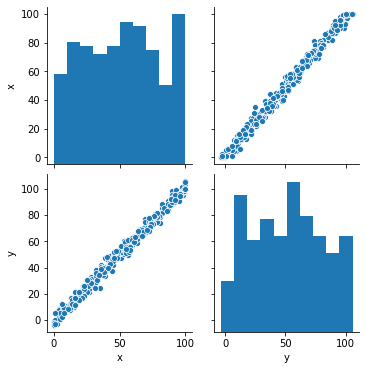

In [27]:
sns.pairplot(df)
plt.show()

<Figure size 360x360 with 0 Axes>

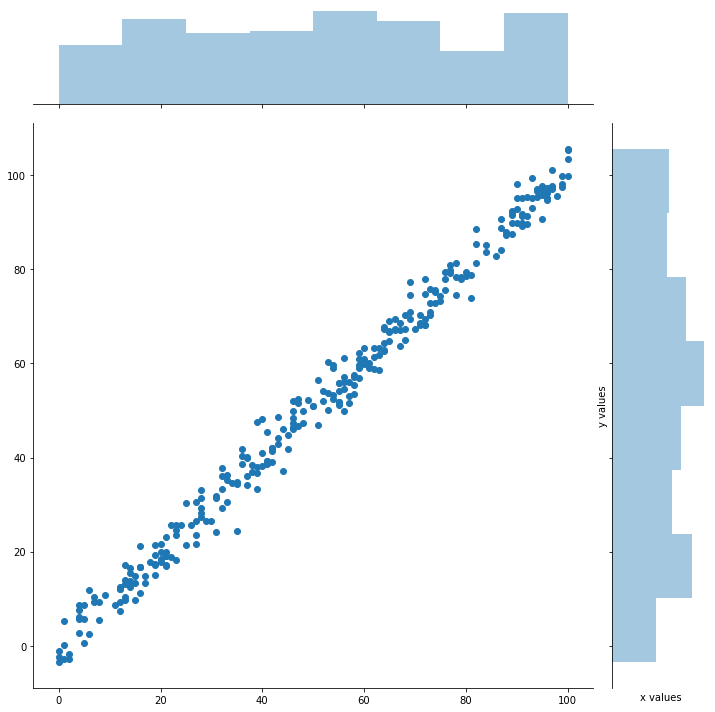

In [28]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df['x'].values, y=df['y'].values, height=10)  #comparing both columns
plt.ylabel('y values')
plt.xlabel('x values')
plt.show() 

* show the covariance and correlation matrixes (including heatmap if you'd like).

In [29]:
df.cov()

,x,y
x,812.494303,824.141698
y,824.141698,845.150999


In [30]:
df.corr()

,x,y
x,1.000000,0.994545
y,0.994545,1.000000


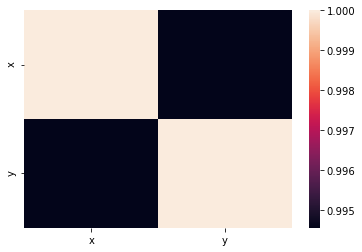

In [31]:
sns.heatmap(df.corr())

b. Train a linear regression model using week-20-class-2 as reference. We'd like to predict column `y`.

Make sure to do the following:
* Separate values into `X` and `Y` variables.

In [32]:
X = df["x"]
Y = df["y"]

* Generate training and test data for `X` and `Y` using `train_test_split` (with a test size of 20%)

In [33]:
from sklearn.model_selection import train_test_split #used to split data  
#it will give us back a tuple so we will unpack it
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)  #80/20 20% for the test.This gets picked randomly

In [34]:
#We will reshape it so we get a column again
y_train.values.reshape(-1,1) 

array([[ 38.98317436],
       [ -2.81991397],
       [ 87.84749912],
       [ 17.0854783 ],
       [ 79.3142548 ],
       [ 75.07484683],
       [  7.64652976],
       [ 67.38654703],
       [ 59.07247174],
       [ 91.69240746],
       [ 63.19354354],
       [ 13.83959878],
       [ 45.44599591],
       [ 57.19103506],
       [ 59.61247085],
       [ 67.01715955],
       [  9.3914168 ],
       [ 97.55155344],
       [ 62.60089773],
       [ 66.61499643],
       [ -1.63296825],
       [ 13.12109842],
       [101.0697879 ],
       [ 62.82816355],
       [ 48.09843134],
       [ 54.09063686],
       [ 95.15647284],
       [ 90.65513736],
       [ 99.87382707],
       [ 23.52647153],
       [ 46.69013968],
       [  8.67333636],
       [ 75.59701346],
       [ 37.08457698],
       [ 95.14907176],
       [ 74.45114379],
       [ 82.870594  ],
       [ 39.3294153 ],
       [ 59.10598995],
       [ 16.82839701],
       [ 58.87465933],
       [ 70.3698748 ],
       [ 79.44769523],
       [ 66

* Create an instance of the `LinearRegression` class and run the regression.

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [36]:
score = reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

* Output the score of the regression.

In [37]:
score

0.9868221078351391

* Chart the data.

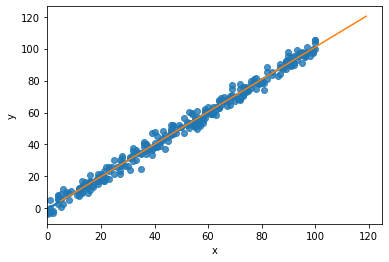

In [39]:
x_line = np.arange(5,120).reshape(-1,1)
ax= sns.regplot(x='x', y='y', data=df, fit_reg=True)
plt.plot(x_line, reg.predict(x_line))
m, b = np.polyfit(X, Y, 1)
plt.show()

* Bonus: what was the y-intercept and slope? Use the documentation to find this information out.

In [40]:
f"The y intercept is: {reg.intercept_}"

'The y intercept is: [-0.40565959]'

In [41]:
f"The y intercept is: {reg.coef_}"

'The y intercept is: [[1.01420179]]'

In [42]:
f"The equation of this line is:  y= {reg.intercept_} + {reg.coef_}x"

'The equation of this line is:  y= [-0.40565959] + [[1.01420179]]x'

# Part 3

Using a dataset of your choosing (try kaggle if stuck). Set up and run a linear regression on the data using the steps from Part 2. Don't worry if your results are inconclusive (it happens). Demonstrate that you're able to do it.

In [43]:
df2 = pd.read_csv("bike_sharing_data.txt")
df2

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [44]:
df2.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [45]:
for col in df2.columns: 
    print(col)

Population
Profit


In [46]:
df2.shape

(97, 2)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [48]:
df2.isna().sum().sort_values(ascending=False)

Profit        0
Population    0
dtype: int64

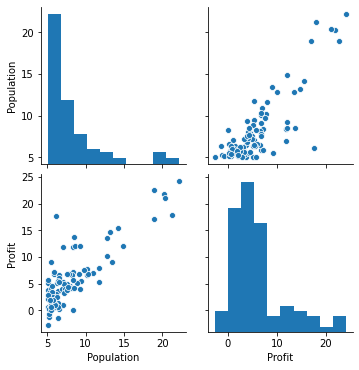

In [74]:
sns.pairplot(df2)
plt.show()

<Figure size 360x360 with 0 Axes>

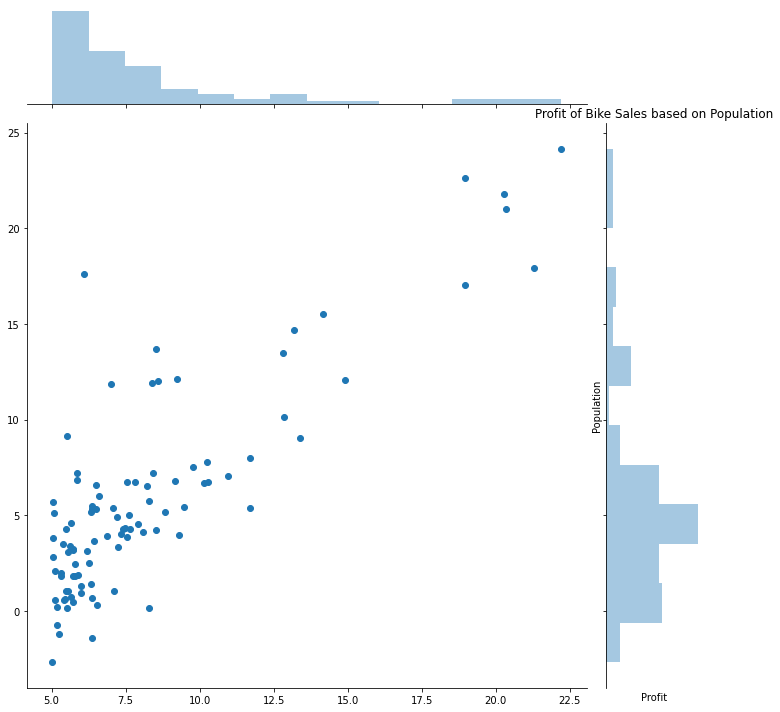

In [49]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df2['Population'].values, y=df2['Profit'].values, height=10)  #comparing both columns
plt.ylabel('Population')
plt.xlabel('Profit')
plt.title("Profit of Bike Sales based on Population")
plt.show() 

In [50]:
df2.cov()

,Population,Profit
Population,14.975999,17.86687
Profit,17.866870,30.36299


In [51]:
df2.corr()

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


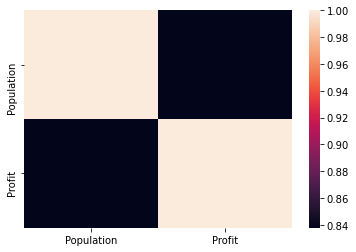

In [52]:
sns.heatmap(df2.corr())

In [53]:
X = df2["Population"]
Y = df2["Profit"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [56]:
score = reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

In [57]:
score

0.5184945470340541

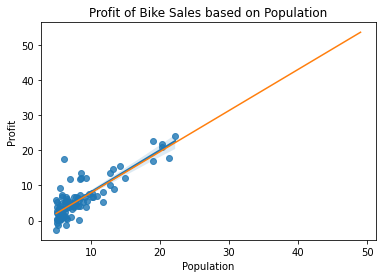

In [58]:
x_line = np.arange(5,50).reshape(-1,1)
ax= sns.regplot(x='Population', y='Profit', data=df2, fit_reg=True)
plt.plot(x_line, reg.predict(x_line))
m, b = np.polyfit(X, Y, 1)
plt.title("Profit of Bike Sales based on Population")
plt.show()

In [59]:
f"The y intercept is: {reg.intercept_}"

'The y intercept is: [-3.86672132]'

In [60]:
f"The y intercept is: {reg.coef_}"

'The y intercept is: [[1.17268944]]'

In [61]:
f"The equation of this line is:  y= {reg.intercept_} + {reg.coef_}x"

'The equation of this line is:  y= [-3.86672132] + [[1.17268944]]x'